In [1]:
# install.packages("C50")
# install.packages("caret")
# install.packages("ggpubr")
# install.packages("factoextra")
# install.packages("devtools")
# install.packages("outliers")

# install.packages("smotefamily")

also installing the dependencies 'libcoin', 'Formula', 'inum', 'Cubist', 'partykit'





The downloaded binary packages are in
	/var/folders/bj/lgd1pp8n2jl_c63chxnrqg340000gp/T//Rtmp8yciiz/downloaded_packages

The downloaded binary packages are in
	/var/folders/bj/lgd1pp8n2jl_c63chxnrqg340000gp/T//Rtmp8yciiz/downloaded_packages

The downloaded binary packages are in
	/var/folders/bj/lgd1pp8n2jl_c63chxnrqg340000gp/T//Rtmp8yciiz/downloaded_packages

The downloaded binary packages are in
	/var/folders/bj/lgd1pp8n2jl_c63chxnrqg340000gp/T//Rtmp8yciiz/downloaded_packages

The downloaded binary packages are in
	/var/folders/bj/lgd1pp8n2jl_c63chxnrqg340000gp/T//Rtmp8yciiz/downloaded_packages

The downloaded binary packages are in
	/var/folders/bj/lgd1pp8n2jl_c63chxnrqg340000gp/T//Rtmp8yciiz/downloaded_packages


also installing the dependencies 'FNN', 'dbscan'





The downloaded binary packages are in
	/var/folders/bj/lgd1pp8n2jl_c63chxnrqg340000gp/T//Rtmp8yciiz/downloaded_packages


In [4]:
library ( C50         )
library ( caret       )
library ( ggpubr      )
library ( devtools    )
library ( outliers    )
library ( smotefamily )


library (  factoextra    )
# install_github("vqv/ggbiplot")
library (  ggbiplot      )
library(readr)


In [6]:
df <- read_delim("./ENB2012_data_f.csv", delim = ';')

Rows: 768 Columns: 10
-- Column specification --------------------------------------------------------
Delimiter: ";"
dbl (10): X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
head( df, 3 )

X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.98,514.5,294,110.25,7,2,0,0,15.55,21.33
0.98,514.5,294,110.25,7,3,0,0,15.55,21.33
0.98,514.5,294,110.25,7,4,0,0,15.55,21.33


In [13]:
# Convertir las columnas a factores
df <- as.data.frame(lapply(df, function(x) {
  if (is.character(x)) as.factor(x) else x
}))

In [15]:
head( df, 3 )

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0.98,514.5,294,110.25,7,2,0,0,15.55,21.33
2,0.98,514.5,294,110.25,7,3,0,0,15.55,21.33
3,0.98,514.5,294,110.25,7,4,0,0,15.55,21.33


### 1.3. Datos perdidos

In [16]:
colSums(is.na(df))

X1 X2 X3 X4 X5 X6 X7 X8 Y1 Y2 
 0  0  0  0  0  0  0  0  0  0

In [17]:
str(df[, c(1:8)])


'data.frame':	768 obs. of  8 variables:
 $ X1: Factor w/ 12 levels "0.62","0.64",..: 12 12 12 12 11 11 11 11 10 10 ...
 $ X2: Factor w/ 12 levels "514.5","563.5",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ X3: Factor w/ 7 levels "245","269.5",..: 3 3 3 3 4 4 4 4 3 3 ...
 $ X4: Factor w/ 4 levels "110.25","122.5",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ X5: Factor w/ 2 levels "3.5","7": 2 2 2 2 2 2 2 2 2 2 ...
 $ X6: Factor w/ 4 levels "2","3","4","5": 1 2 3 4 1 2 3 4 1 2 ...
 $ X7: Factor w/ 4 levels "0","0.1","0.25",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ X8: Factor w/ 6 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...


# Pre-procesamiento de los datos

In [25]:
data_raw <- data.frame(lapply(df, function(x) {
  if (is.factor(x)) as.numeric(as.character(x)) else x
}))
data <- data_raw[, c(1:8)]
sm_pca <- prcomp(data, center=TRUE, scale=TRUE)
summary( sm_pca )

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.9243 1.1135 1.1013 1.0000 0.88715 0.22968 0.06675
Proportion of Variance 0.4629 0.1550 0.1516 0.1250 0.09838 0.00659 0.00056
Cumulative Proportion  0.4629 0.6179 0.7695 0.8945 0.99285 0.99944 1.00000
                             PC8
Standard deviation     4.667e-15
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

In [33]:
# Calcular el mínimo y máximo de Y1
min_y1 <- min(data_raw$Y1, na.rm = TRUE)
max_y1 <- max(data_raw$Y1, na.rm = TRUE)

# Mostrar los valores
min_y1
max_y1



[1] 6.01

[1] 43.1

In [34]:
n_intervals <- 4

# Crear los intervalos
breaks <- seq(min_y1, max_y1, length.out = n_intervals + 1)
labels <- paste0("Rango ", seq(1, n_intervals))


In [35]:
data_raw$Y1_group <- cut(data_raw$Y1, breaks = breaks, labels = labels, include.lowest = TRUE)
table(data_raw$Y1_group)


Rango 1 Rango 2 Rango 3 Rango 4 
    309     129     210     120 

In [37]:
length(data_raw$Y1_group)

[1] 768

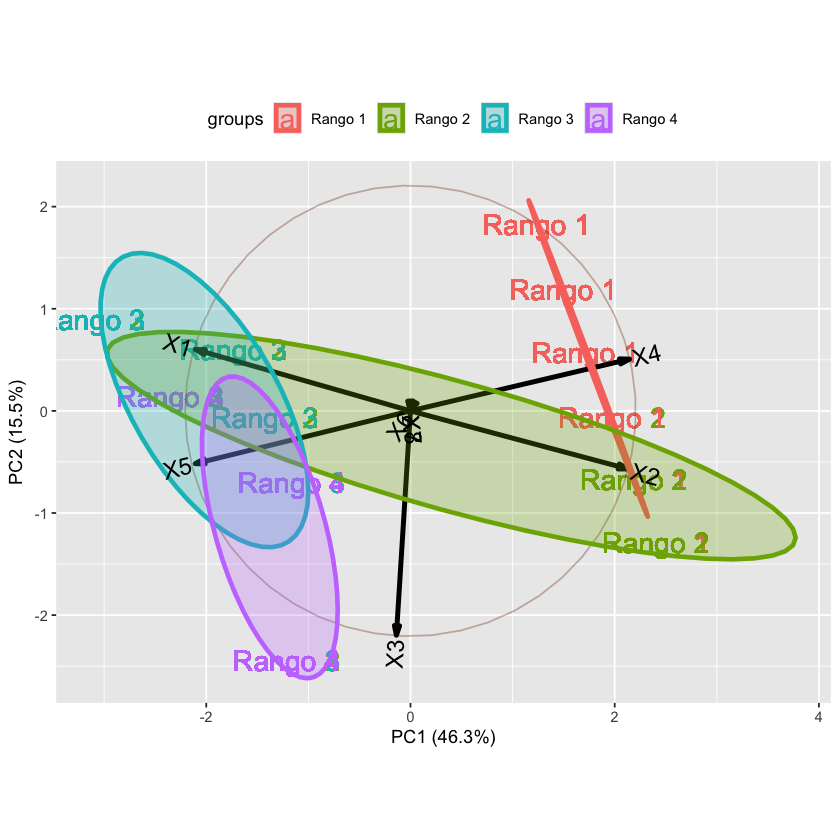

In [38]:
sm_y1 <- as.factor(data_raw$Y1_group)
ggbiplot( sm_pca, ellipse=TRUE, circle=TRUE, labels=sm_y1, groups = sm_y1,
          varname.size=5, labels.size=6, var.scale = 1, obs.scale = 1) +
          theme(legend.direction = 'horizontal', legend.position = 'top')

In [39]:
pv <- sm_pca$sdev^2 / sum(sm_pca$sdev^2)
pev <- cumsum(pv)
pev

[1] 0.4628674 0.6178488 0.7694694 0.8944694 0.9928488 0.9994431 1.0000000
[8] 1.0000000

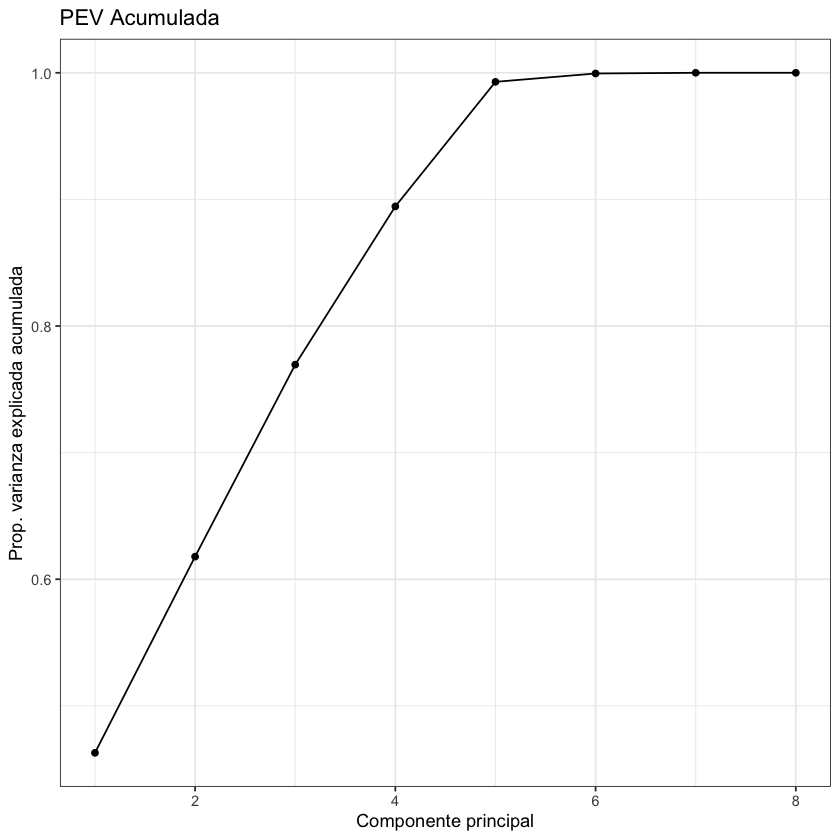

In [41]:
ggplot(data = data.frame(pev, pc = 1:8),
       aes(x = pc, y = pev, group = 1)) +
       geom_point() +
       geom_line() +
       ggtitle("PEV Acumulada")+
       theme_bw() +
       labs(x = "Componente principal",
            y = "Prop. varianza explicada acumulada")

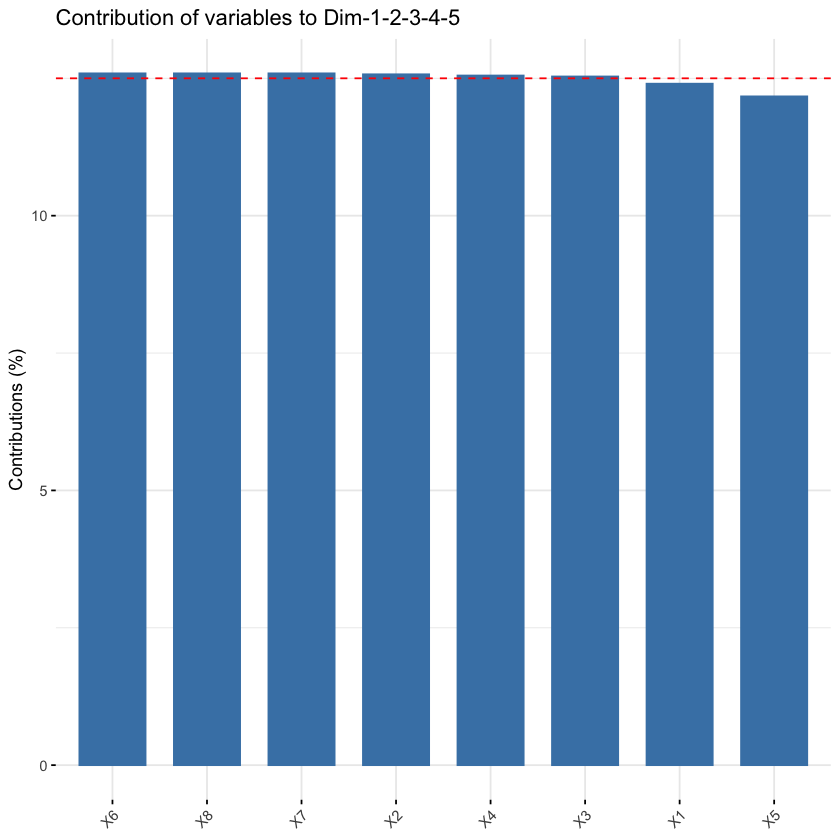

In [44]:
fviz_contrib(sm_pca, choice="var", axes=1:5)

In [48]:
drops <- c( "X6", "X7", "X8", "Y1","Y2")
sm_reduced <- data_raw[ , !(names(data_raw) %in% drops)]
sm_reduced$Y1_group <- as.factor( sm_reduced$Y1_group )

head( sm_reduced, 3 )
tail( sm_reduced, 3 )

,X1,X2,X3,X4,X5,Y1_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.98,514.5,294,110.25,7,Rango 2
2,0.98,514.5,294,110.25,7,Rango 2
3,0.98,514.5,294,110.25,7,Rango 2


,X1,X2,X3,X4,X5,Y1_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
766,0.62,808.5,367.5,220.5,3.5,Rango 2
767,0.62,808.5,367.5,220.5,3.5,Rango 2
768,0.62,808.5,367.5,220.5,3.5,Rango 2


In [50]:
levels_y1 <- levels(sm_reduced$Y1_group)

# Resumen de datos
for (level in levels_y1) {
  cat(paste0("=== Resumen de datos para ", level, " ===\n"))
  print(summary(sm_reduced[sm_reduced$Y1_group == level,]))
  cat("\n")
}


=== Resumen de datos para Rango 1 ===
       X1               X2              X3              X4              X5     
 Min.   :0.6200   Min.   :686.0   Min.   :245.0   Min.   :220.5   Min.   :3.5  
 1st Qu.:0.6600   1st Qu.:710.5   1st Qu.:269.5   1st Qu.:220.5   1st Qu.:3.5  
 Median :0.6900   Median :735.0   Median :294.0   Median :220.5   Median :3.5  
 Mean   :0.6864   Mean   :737.3   Mean   :296.3   Mean   :220.5   Mean   :3.5  
 3rd Qu.:0.7100   3rd Qu.:759.5   3rd Qu.:318.5   3rd Qu.:220.5   3rd Qu.:3.5  
 Max.   :0.7400   Max.   :808.5   Max.   :367.5   Max.   :220.5   Max.   :3.5  
    Y1_group  
 Rango 1:309  
 Rango 2:  0  
 Rango 3:  0  
 Rango 4:  0  
              
              

=== Resumen de datos para Rango 2 ===
       X1               X2              X3              X4       
 Min.   :0.6200   Min.   :514.5   Min.   :294.0   Min.   :110.2  
 1st Qu.:0.6400   1st Qu.:612.5   1st Qu.:318.5   1st Qu.:147.0  
 Median :0.6400   Median :784.0   Median :343.0   Median :22

# 3. Generación de modelo

In [51]:
set.seed( 1237 )

sm_indexes   <- createDataPartition( sm_reduced$Y1_group, p=0.80, list = F )
sm_train.set_reduced <- sm_reduced[sm_indexes,]
sm_test.set_reduced  <- sm_reduced[-sm_indexes,]

In [52]:
prop.table(table(sm_train.set_reduced$Y1_group))


  Rango 1   Rango 2   Rango 3   Rango 4 
0.4025974 0.1688312 0.2727273 0.1558442 

In [53]:
prop.table(table(sm_test.set_reduced$Y1_group))


  Rango 1   Rango 2   Rango 3   Rango 4 
0.4013158 0.1644737 0.2763158 0.1578947 

In [54]:
dim( sm_train.set_reduced )
head( sm_train.set_reduced, 3 )

[1] 616   6

,X1,X2,X3,X4,X5,Y1_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.98,514.5,294,110.25,7,Rango 2
3,0.98,514.5,294,110.25,7,Rango 2
4,0.98,514.5,294,110.25,7,Rango 2


In [55]:
dim( sm_test.set_reduced )
head( sm_test.set_reduced, 3 )

[1] 152   6

,X1,X2,X3,X4,X5,Y1_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,0.98,514.5,294.0,110.25,7.0,Rango 2
6,0.90,563.5,318.5,122.50,7.0,Rango 2
26,0.74,686.0,245.0,220.50,3.5,Rango 1


## Modelo

In [60]:
#Modelo de clasificación con instancia de entrenamiento
sm.tree_reduced <- C5.0( Y1_group ~ ., sm_train.set_reduced ) 

#Modelo basado en reglas
tree.rules_reduced <- C5.0( x = sm_train.set_reduced[, -1 ], y = sm_train.set_reduced$Y1_group, rules = T )

In [63]:
sm.tree_reduced


Call:
C5.0.formula(formula = Y1_group ~ ., data = sm_train.set_reduced)

Classification Tree
Number of samples: 616 
Number of predictors: 5 

Tree size: 5 

Non-standard options: attempt to group attributes


In [61]:
model_vars <- names(sm.tree_reduced$terms)
print(model_vars)

NULL


In [57]:
summary(sm.tree_reduced )


Call:
C5.0.formula(formula = Y1_group ~ ., data = sm_train.set_reduced)


C5.0 [Release 2.07 GPL Edition]  	Wed Jun 19 21:31:27 2024
-------------------------------

Class specified by attribute `outcome'

Read 616 cases (6 attributes) from undefined.data

Decision tree:

X5 > 3.5:
:...X3 <= 318.5: Rango 3 (201/57)
:   X3 > 318.5: Rango 4 (107/26)
X5 <= 3.5:
:...X1 > 0.64: Rango 1 (208/6)
    X1 <= 0.64:
    :...X1 <= 0.62: Rango 1 (49/16)
        X1 > 0.62: Rango 2 (51/13)


Evaluation on training data (616 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     5  118(19.2%)   <<


	   (a)   (b)   (c)   (d)    <-classified as
	  ----  ----  ----  ----
	   235    13                (a): class Rango 1
	    22    38    42     2    (b): class Rango 2
	               144    24    (c): class Rango 3
	                15    81    (d): class Rango 4


	Attribute usage:

	100.00%	X5
	 50.00%	X1
	 50.00%	X3


Time: 0.0 secs


In [66]:
sm_test.set_reduced[, -1 ]

,X2,X3,X4,X5,Y1_group
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,514.5,294.0,110.25,7.0,Rango 2
6,563.5,318.5,122.50,7.0,Rango 2
26,686.0,245.0,220.50,3.5,Rango 1
28,686.0,245.0,220.50,3.5,Rango 1
29,710.5,269.5,220.50,3.5,Rango 1
35,735.0,294.0,220.50,3.5,Rango 1
58,588.0,294.0,147.00,7.0,Rango 3
59,588.0,294.0,147.00,7.0,Rango 3
62,612.5,318.5,147.00,7.0,Rango 2


In [67]:
# Predicción de clases con instancia de pruebas
tree.pred.class_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "class")

# Probabilidad por clases
tree.pred.prob_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "prob")


In [69]:
head( tree.pred.prob_reduced, 3 )

,Rango 1,Rango 2,Rango 3,Rango 4
2,0.001993056,0.20875659,0.714221420,0.0750289288
6,0.001993056,0.20875659,0.714221420,0.0750289288
26,0.968433481,0.02951594,0.001304915,0.0007456658


In [70]:
tree.pred.class_reduced

[1] Rango 3 Rango 3 Rango 1 Rango 1 Rango 1 Rango 1 Rango 3 Rango 3 Rango 3
 [10] Rango 1 Rango 1 Rango 1 Rango 1 Rango 1 Rango 3 Rango 3 Rango 3 Rango 3
 [19] Rango 4 Rango 1 Rango 1 Rango 1 Rango 1 Rango 1 Rango 2 Rango 2 Rango 1
 [28] Rango 3 Rango 3 Rango 3 Rango 4 Rango 4 Rango 2 Rango 1 Rango 3 Rango 3
 [37] Rango 4 Rango 4 Rango 1 Rango 1 Rango 1 Rango 1 Rango 1 Rango 2 Rango 3
 [46] Rango 3 Rango 4 Rango 1 Rango 1 Rango 1 Rango 1 Rango 3 Rango 3 Rango 4
 [55] Rango 4 Rango 1 Rango 1 Rango 1 Rango 2 Rango 1 Rango 3 Rango 3 Rango 3
 [64] Rango 3 Rango 3 Rango 3 Rango 4 Rango 1 Rango 1 Rango 2 Rango 1 Rango 3
 [73] Rango 3 Rango 3 Rango 3 Rango 3 Rango 3 Rango 4 Rango 2 Rango 1 Rango 1
 [82] Rango 3 Rango 3 Rango 4 Rango 1 Rango 1 Rango 1 Rango 1 Rango 1 Rango 1
 [91] Rango 2 Rango 1 Rango 1 Rango 3 Rango 3 Rango 3 Rango 3 Rango 3 Rango 4
[100] Rango 4 Rango 4 Rango 1 Rango 2 Rango 1 Rango 3 Rango 3 Rango 3 Rango 4
[109] Rango 1 Rango 1 Rango 1 Rango 1 Rango 2 Rango 1 Rango 3 Rango 3 Rango 3
[118] Rango 3 Rango 3 Rango 1 Rango 3 Rango 4 Rango 1 Rango 1 Rango 1 Rango 2
[127] Rango 1 Rango 3 Rango 3 Rango 3 Rango 4 Rango 4 Rango 4 Rango 1 Rango 1
[136] Rango 2 Rango 1 Rango 3 Rango 3 Rango 3 Rango 3 Rango 3 Rango 3 Rango 4
[145] Rango 4 Rango 1 Rango 1 Rango 1 Rango 1 Rango 1 Rango 2 Rango 1
Levels: Rango 1 Rango 2 Rango 3 Rango 4

In [71]:
dev.new( width=10, height=10 )

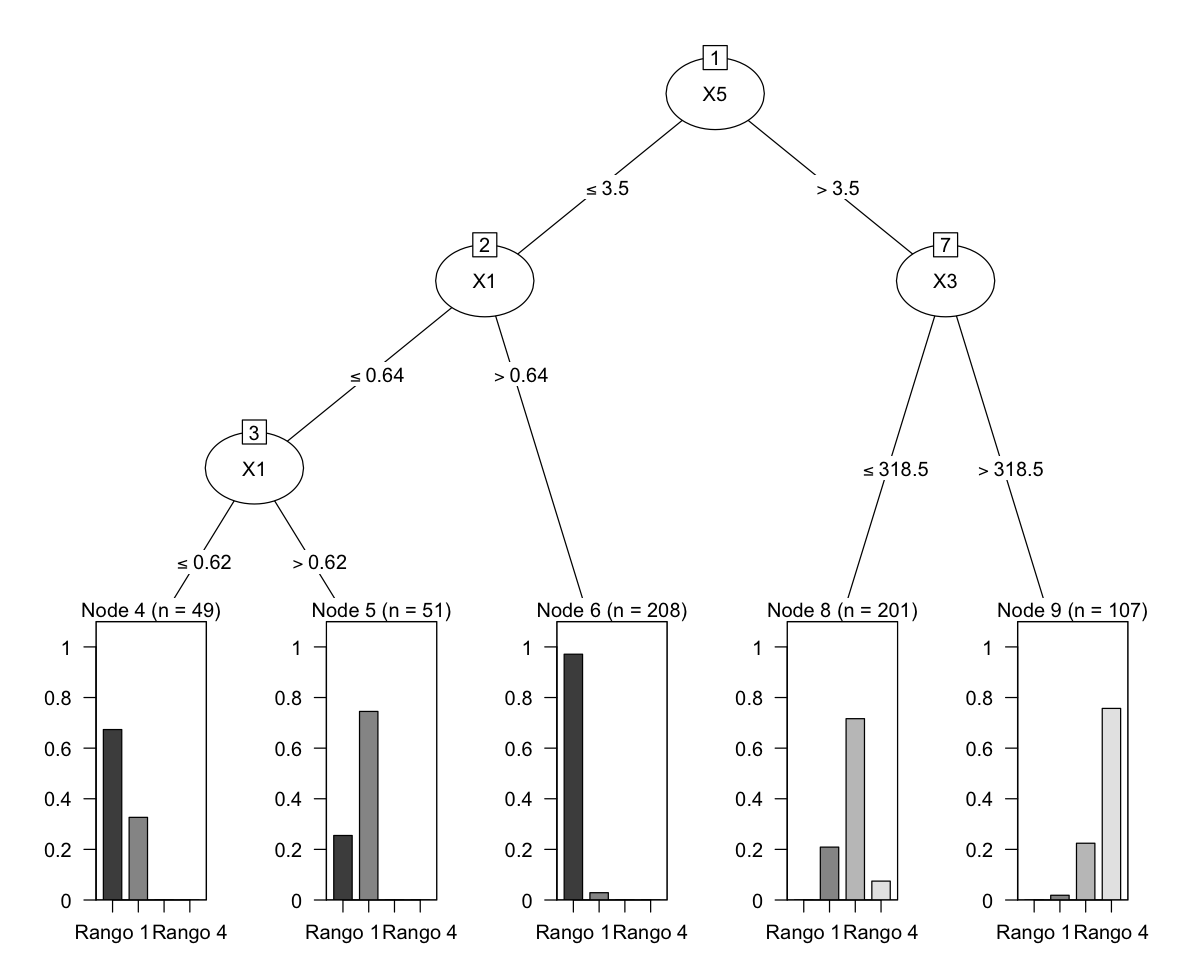

In [72]:
options(repr.plot.width=10, repr.plot.height=8)
plot( sm.tree_reduced )

In [73]:
summary( tree.rules_reduced )


Call:
C5.0.default(x = sm_train.set_reduced[, -1], y =
 sm_train.set_reduced$Y1_group, rules = T)


C5.0 [Release 2.07 GPL Edition]  	Wed Jun 19 21:37:16 2024
-------------------------------

Class specified by attribute `outcome'

Read 616 cases (6 attributes) from undefined.data

Rules:

Rule 1: (248, lift 2.5)
	Y1_group = Rango 1
	->  class Rango 1  [0.996]

Rule 2: (104, lift 5.9)
	Y1_group = Rango 2
	->  class Rango 2  [0.991]

Rule 3: (168, lift 3.6)
	Y1_group = Rango 3
	->  class Rango 3  [0.994]

Rule 4: (96, lift 6.4)
	Y1_group = Rango 4
	->  class Rango 4  [0.990]

Default class: Rango 1


Evaluation on training data (616 cases):

	        Rules     
	  ----------------
	    No      Errors

	     4    0( 0.0%)   <<


	   (a)   (b)   (c)   (d)    <-classified as
	  ----  ----  ----  ----
	   248                      (a): class Rango 1
	         104                (b): class Rango 2
	               168          (c): class Rango 3
	                      96    (d): class Rango 4

In [74]:
conf.matrix.tree_reduced <- confusionMatrix(table( sm_test.set_reduced$Y1_group, tree.pred.class_reduced ))
print( conf.matrix.tree_reduced )

Confusion Matrix and Statistics

         tree.pred.class_reduced
          Rango 1 Rango 2 Rango 3 Rango 4
  Rango 1      60       1       0       0
  Rango 2       3      12      10       0
  Rango 3       0       0      40       2
  Rango 4       0       0       5      19

Overall Statistics
                                          
               Accuracy : 0.8618          
                 95% CI : (0.7966, 0.9124)
    No Information Rate : 0.4145          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.802           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Rango 1 Class: Rango 2 Class: Rango 3
Sensitivity                  0.9524        0.92308         0.7273
Specificity                  0.9888        0.90647         0.9794
Pos Pred Value               0.9836        0.48000         0.9524
Neg Pred Value               0

## Boosting

In [75]:
sm.tree_reduced <- C5.0(Y1_group ~ ., data = sm_train.set_reduced, trials = 10)


In [76]:
any(is.na(sm_test.set_reduced))

sm_test.set_reduced <- na.omit(sm_test.set_reduced)


[1] FALSE

In [77]:
# Predicción de clases con instancia de pruebas
tree.pred.class_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "class")

# Probabilidad por clases
tree.pred.prob_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "prob")


In [78]:
library(caret)
confusionMatrix(data = tree.pred.class_reduced, reference = sm_test.set_reduced$Y1_group, positive = "yes")


Confusion Matrix and Statistics

          Reference
Prediction Rango 1 Rango 2 Rango 3 Rango 4
   Rango 1      61      15       0       0
   Rango 2       0       0       0       0
   Rango 3       0      10      40       5
   Rango 4       0       0       2      19

Overall Statistics
                                         
               Accuracy : 0.7895         
                 95% CI : (0.716, 0.8513)
    No Information Rate : 0.4013         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6893         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: Rango 1 Class: Rango 2 Class: Rango 3
Sensitivity                  1.0000         0.0000         0.9524
Specificity                  0.8352         1.0000         0.8636
Pos Pred Value               0.8026            NaN         0.7273
Neg Pred Value               1.0000         0.8

In [ ]:
modeloc50_1 <- C5.0(data_training[-17], data_training$default, trials = 10) 
data_predicted2 <- predict(modeloc50_1, data_test)
confusionMatrix(data = data_predicted2, reference = data_test$default, positive = "yes")

In [80]:
accuracy_results <- data.frame(Trials = integer(), Accuracy = double())

for (trials in c(1, 5, 10, 20, 50, 100)) {
  sm.tree_reduced <- C5.0(Y1_group ~ ., data = sm_train.set_reduced, trials = trials)
  tree.pred.class_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "class")
  
  cm <- confusionMatrix(data = tree.pred.class_reduced, reference = sm_test.set_reduced$Y1_group, positive = "yes")
  
  accuracy_results <- rbind(accuracy_results, data.frame(Trials = trials, Accuracy = cm$overall["Accuracy"]))
}

print(accuracy_results)

          Trials  Accuracy
Accuracy       1 0.8618421
Accuracy1      5 0.8026316
Accuracy2     10 0.7894737
Accuracy3     20 0.8618421
Accuracy4     50 0.7894737
Accuracy5    100 0.7894737


In [82]:
train_control <- trainControl(method = "cv", number = 10)

tuned_model <- train(
  Y1_group ~ ., 
  data = sm_train.set_reduced, 
  method = "C5.0",
  trControl = train_control,
  tuneGrid = expand.grid(trials = c(1, 5, 10, 20, 50, 100), model = "tree", winnow = FALSE)
)

print(tuned_model$bestTune)

best_model <- C5.0(Y1_group ~ ., data = sm_train.set_reduced, trials = tuned_model$bestTune$trials)
tree.pred.class_reduced <- predict(best_model, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "class")

cm <- confusionMatrix(data = tree.pred.class_reduced, reference = sm_test.set_reduced$Y1_group, positive = "yes")
print(cm)

Warning message:
"'trials' should be <= 12 for this object. Predictions generated using 12 trials"
Warning message:
"'trials' should be <= 12 for this object. Predictions generated using 12 trials"
Warning message:
"'trials' should be <= 22 for this object. Predictions generated using 22 trials"
Warning message:
"'trials' should be <= 22 for this object. Predictions generated using 22 trials"
Warning message:
"'trials' should be <= 23 for this object. Predictions generated using 23 trials"
Warning message:
"'trials' should be <= 20 for this object. Predictions generated using 20 trials"
Warning message:
"'trials' should be <= 14 for this object. Predictions generated using 14 trials"
Warning message:
"'trials' should be <= 14 for this object. Predictions generated using 14 trials"
Warning message:
"'trials' should be <= 19 for this object. Predictions generated using 19 trials"
Warning message:
"'trials' should be <= 19 for this object. Predictions generated using 19 trials"
Warning me

  trials model winnow
1      1  tree  FALSE
Confusion Matrix and Statistics

          Reference
Prediction Rango 1 Rango 2 Rango 3 Rango 4
   Rango 1      60       3       0       0
   Rango 2       1      12       0       0
   Rango 3       0      10      40       5
   Rango 4       0       0       2      19

Overall Statistics
                                          
               Accuracy : 0.8618          
                 95% CI : (0.7966, 0.9124)
    No Information Rate : 0.4013          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.802           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Rango 1 Class: Rango 2 Class: Rango 3
Sensitivity                  0.9836        0.48000         0.9524
Specificity                  0.9670        0.99213         0.8636
Pos Pred Value               0.9524        0.92308         0